# Pandas - Python Data Analysis

Pandas é uma biblioteca para trabalhar com a parte de preparação de dados. De certa forma, suas operações são similares às operações SQL em bancos de dados, operando sobre dados tabulares, com a principal diferença sendo que pandas é utilizado em memória e localmente, enquanto bases SQL geralmente são operadas em disco e em servidores.

Os dados em Pandas são organizados em `Series`, que seria equivalente a uma coluna de uma tabela, e `DataFrames`, que representam as tabelas propriamente ditas. De certa forma, os dados em uma `Series` são como um `ndarray` do Numpy.

Um `DataFrame` pode ser criado de várias formas, mas comumente é feito a partir de dados em um banco de dados SQL, um arquivo Excel, de uma matriz ou vetores Numpy, ou um arquivo CSV.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Shapes

Antes de entrar em pandas propriamente dito, uma nota sobre _shapes_ em Numpy.

In [2]:
x = np.array([[5, 2],
              [1, 3],
              [7, 8]])
x.shape

(3, 2)

In [3]:
x.T

array([[5, 1, 7],
       [2, 3, 8]])

In [4]:
x.T.shape

(2, 3)

In [5]:
x2 = np.array([5, 2, 1, 3, 7, 8]).reshape(3, 2)
x2

array([[5, 2],
       [1, 3],
       [7, 8]])

In [6]:
np.array_equal(x, x2)

True

Pergunta: por que `np.array_equal(x, x2)` e não `x == x2`?

In [7]:
x3 = x.reshape(-1, 1)
print(x3.shape)
x3

(6, 1)


array([[5],
       [2],
       [1],
       [3],
       [7],
       [8]])

In [8]:
x4 = x.reshape(1, -1)
print(x4.shape)
x4

(1, 6)


array([[5, 2, 1, 3, 7, 8]])

In [9]:
x5 = x.ravel() # igual .reshape(-1)
print(x5.shape)
x5

(6,)


array([5, 2, 1, 3, 7, 8])

In [10]:
print(np.array_equal(x3, x4))
print(np.array_equal(x3, x5))
print(np.array_equal(x4, x5))
print(np.array_equal(x5, x.reshape(-1)))

False
False
False
True


- O tamanho de cada dimensão é guardado na variável `shape` do vetor
- Um vetor-linha (N, 1) é diferente de um vetor-coluna (1, N)
  - Geralmente usamos vetor-linha para representar uma amostra, e vetor-coluna para representar um atributo
- E ambos são diferentes de um vetor unidimensional, que é ambíguo se representa uma amostra ou atributo
- Quando damos reshape, o valor -1 indica "o valor necessário para ser compatível"; somente uma dimensão pode ser reshaped pra -1, caso contrário o reshape é ambíguo
- A função `ravel` deixa a dimensão de um vetor com (N,), e é só um atalho para `reshape(-1)`.

Cores: ['red' 'red' 'black' 'red' 'black'] Tipo: <U5


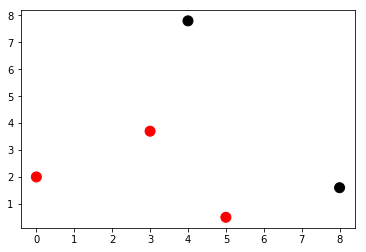

In [11]:
x1 = np.array([5,    3,    8,     0,    4])
x2 = np.array([0.5,  3.7,  1.6,   2,    7.8])
y = np.array( ['Sim', 'Sim', 'Não', 'Sim', 'Não'])

def mapeia_cor(val):
  if val == 'Sim':
    return 'red'
  else:
    return 'black'

cor = np.vectorize(mapeia_cor)(y)
print('Cores:', cor, 'Tipo:', cor.dtype)
plt.scatter(x1, x2, c=cor, s=100);

In [15]:
dados = pd.DataFrame({'Quantidade de crianças': x1,
                      'Renda familiar (salários mínimos)': x2,
                      'Possui débito': pd.Categorical(y)})
dados

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
0,5,0.5,Sim
1,3,3.7,Sim
2,8,1.6,Não
3,0,2.0,Sim
4,4,7.8,Não


In [16]:
dados.shape

(5, 3)

In [17]:
len(dados)

5

In [18]:
dados.dtypes

Quantidade de crianças                  int64
Renda familiar (salários mínimos)     float64
Possui débito                        category
dtype: object

In [19]:
dados.head(2)

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
0,5,0.5,Sim
1,3,3.7,Sim


In [20]:
dados.describe()

,Quantidade de crianças,Renda familiar (salários mínimos)
count,5.000000,5.000000
mean,4.000000,3.120000
std,2.915476,2.857796
min,0.000000,0.500000
25%,3.000000,1.600000
50%,4.000000,2.000000
75%,5.000000,3.700000
max,8.000000,7.800000


In [21]:
dados.describe(include=['category'])

,Possui débito
count,5
unique,2
top,Sim
freq,3


## Indexação/seleção

Uma vantagem do pandas são as formas de indexação. Antes de entrar nos detalhes do pandas, vamos ver um novo tipo de indexação para vetores do numpy que ainda não discutimos: coleção de índices.

In [22]:
x1

array([5, 3, 8, 0, 4])

In [23]:
indices = np.array([2, 4])
x1[indices]

array([8, 4])

In [24]:
# também funciona com listas como índice, e a sintaxe abaixo é comum
x1[[2, 4]]

array([8, 4])

Assim, vimos as seguintes formas de indexação:

- Índices direto: `x1[2] == 8`
- _Slicing_/intervalos: `x1[2:4] == [8, 0]`
- Máscaras booleanas: `x1[[True, False, True, False, False]] == [5, 8]`
- Coleção de índices: `x1[[2, 4]] == [8, 4]`

Todas essas formas também funcionam com pandas. A diferença é que em pandas, os índices **não necessariamente são inteiros começando em zero**.

In [25]:
dados.columns

Index(['Quantidade de crianças', 'Renda familiar (salários mínimos)',
       'Possui débito'],
      dtype='object')

In [26]:
dados.index

RangeIndex(start=0, stop=5, step=1)

No caso das linhas (`dados.index`), o índice é o intervalo entre 0 e 4, como indicado pelo `range(0, 5)`. Mas no caso das colunas, o **índice é o próprio nome das colunas**. Essa é a forma mais comum de tratar de DataFrames, com as colunas sendo indexadas por texto e as linhas sendo indexadas por inteiros.

Além disso, apesar do `DataFrame` ser uma matriz, quando um único índice é passado, a dimensão pode ser qualquer uma das duas dependendo de qual índice se encaixa.

In [27]:
dados['Quantidade de crianças']

0    5
1    3
2    8
3    0
4    4
Name: Quantidade de crianças, dtype: int64

In [28]:
dados[:2]

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
0,5,0.5,Sim
1,3,3.7,Sim


Quando queremos selecionar nos dois eixos simultaneamente, é necessário colocar a propriedade `.loc` na frente do DataFrame para desligar o modo "smart" da indexação. Nesse caso, o primeiro elemento sempre é as linhas e o segundo as colunas, assim como em Numpy. A diferença é que o elemento após o `:` no _slice_ é incluso também (e não até um antes).

Ainda podemos colocar `.iloc` para tratar os índices como se fossem inteiros. Isso não altera a forma de indexação, essa transformação é somente para o comando que utiliza o `iloc` (veja abaixo que o nome da Series ainda é "Possui débito").

Lembre que é possível criar um _slice_ sem nem início nem fim (representado somente por `:`); nesse caso, todos os elementos daquele eixo são selecionados.

In [29]:
dados.loc[:2,
          ['Quantidade de crianças',
           'Renda familiar (salários mínimos)']]

,Quantidade de crianças,Renda familiar (salários mínimos)
0,5,0.5
1,3,3.7
2,8,1.6


In [30]:
dados.iloc[:, 0]

0    5
1    3
2    8
3    0
4    4
Name: Quantidade de crianças, dtype: int64

Note que é possível alterar o método de indexação, mesmo para as linhas.

In [31]:
dados.index = pd.Index(['Alfredo', 'Beatriz', 'Carlos', 'Diana', 'Eduardo'])
dados

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
Alfredo,5,0.5,Sim
Beatriz,3,3.7,Sim
Carlos,8,1.6,Não
Diana,0,2.0,Sim
Eduardo,4,7.8,Não


In [32]:
dados.loc['Beatriz', 'Quantidade de crianças']

3

In [33]:
# no caso que ambos os índices são de texto
# o modo smart assume que trata de colunas
dados['Possui débito']

Alfredo    Sim
Beatriz    Sim
Carlos     Não
Diana      Sim
Eduardo    Não
Name: Possui débito, dtype: category
Categories (2, object): [Não, Sim]

In [34]:
# só voltando para configuração padrão
dados.index = pd.RangeIndex(0, 5)

Só para reforçar: todas as formas de indexação do numpy funcionam com pandas. E como essas operações retornam um novo DataFrame$^1$ e não alteram o original, é possível "encadear" as operações. Dessa forma, basicamente temos as operações SELECT e WHERE do SQL (seleção vertical, seleção horizontal e filtragem por condição), além de algumas operações de agregação que o Numpy oferece (média, soma, etc).

$^1$: mais ou menos. Geralmente se retorna uma _view_ do DataFrame original, mas pode depender da operação e mesmo da versão do pandas.

In [35]:
dados[dados['Possui débito'] == 'Sim']

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
0,5,0.5,Sim
1,3,3.7,Sim
3,0,2.0,Sim


In [36]:
(dados[dados['Quantidade de crianças'] >= 4]
 ['Renda familiar (salários mínimos)'])

0    0.5
2    1.6
4    7.8
Name: Renda familiar (salários mínimos), dtype: float64

In [37]:
dados.loc[dados['Quantidade de crianças'] >= 4, 'Renda familiar (salários mínimos)']

0    0.5
2    1.6
4    7.8
Name: Renda familiar (salários mínimos), dtype: float64

Para utilizar os operadores lógicos **e** e **ou** dentro de uma indexação, são utilizados os símbolos `&` e `|`, respectivamente. É obrigatório colocar parêntesis em cada um dos lados, no entanto.

In [38]:
dados[ (dados['Possui débito'] == 'Não') &
    (dados['Quantidade de crianças'] <= 4)]

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
4,4,7.8,Não


## Atribuição

É possível atribuir valores para células diretamente, assim como com vetores. Mais interessante, se a atribuição é num índice textual que ainda não existe, uma nova coluna é criada.

In [39]:
dados

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
0,5,0.5,Sim
1,3,3.7,Sim
2,8,1.6,Não
3,0,2.0,Sim
4,4,7.8,Não


In [40]:
dados.loc[3, 'Possui débito'] = 'Não'
dados

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito
0,5,0.5,Sim
1,3,3.7,Sim
2,8,1.6,Não
3,0,2.0,Não
4,4,7.8,Não


In [41]:
dados['Tem carro'] = pd.Categorical(['Não', 'Sim', 'Sim', 'Não', 'Sim'])
dados

,Quantidade de crianças,Renda familiar (salários mínimos),Possui débito,Tem carro
0,5,0.5,Sim,Não
1,3,3.7,Sim,Sim
2,8,1.6,Não,Sim
3,0,2.0,Não,Não
4,4,7.8,Não,Sim


## Visualizações e estatísticas básicas

O pandas já nos dá algumas funções prontas para visualização e estatísticas que são comumente aplicadas.

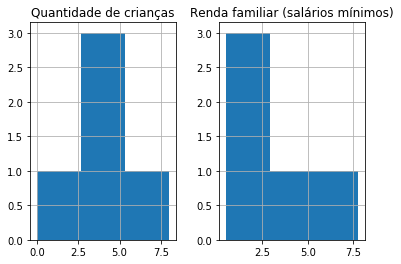

In [42]:
dados.hist(bins=3);

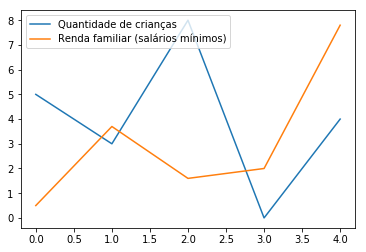

In [43]:
dados.plot();

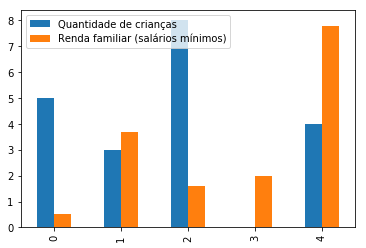

In [44]:
dados.plot(kind='bar');
#dados.plot.bar(); # equivalente

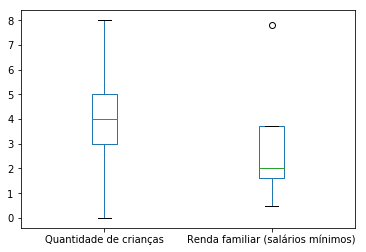

In [45]:
dados.plot(kind='box');

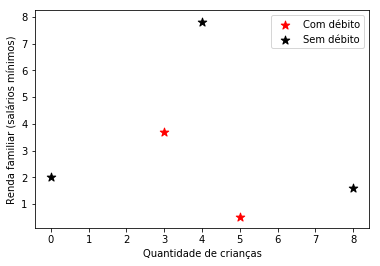

In [46]:
# o parâmetro s é o tamanho do marcador
# diferente do padrão matplotlib, o pandas cria um gráfico por chamada de função, e não um por célula
# para criar múltiplos gráficos juntos, é utilizado o parâmetro ax (entenda-se "utilize o mesmo eixo")

ax = (dados[dados['Possui débito'] == 'Sim'].plot
      .scatter(x='Quantidade de crianças',
               y='Renda familiar (salários mínimos)',
               c='red', marker='*', s=80,
               label='Com débito'))
dados[dados['Possui débito'] == 'Não'].plot.scatter(x='Quantidade de crianças', y='Renda familiar (salários mínimos)', c='black', marker='*', s=80, label='Sem débito', ax=ax);

In [47]:
dados.corr()

,Quantidade de crianças,Renda familiar (salários mínimos)
Quantidade de crianças,1.000000,-0.144026
Renda familiar (salários mínimos),-0.144026,1.000000


In [48]:
dados.cov()

,Quantidade de crianças,Renda familiar (salários mínimos)
Quantidade de crianças,8.5,-1.200
Renda familiar (salários mínimos),-1.2,8.167


In [49]:
dados.kurtosis()

Quantidade de crianças               0.892734
Renda familiar (salários mínimos)    2.004884
dtype: float64

E por fim se lembre, cada coluna é uma `Series`, e as series funcionam como `ndarrays`. Logo, operações vetoriais funcionam com as colunas de um `DataFrame`.

In [50]:
(dados['Quantidade de crianças']
 / dados['Renda familiar (salários mínimos)'])

0    10.000000
1     0.810811
2     5.000000
3     0.000000
4     0.512821
dtype: float64